# project done by mauzum shamil a m with LSTM AND RNN ON SENTIMENT ANALYSIS OF social media review bullying or not bullying

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,SpatialDropout1D,Dropout,Embedding,Activation,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud

import os



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# loading dataset

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\DATASETS\CYBER BULLYING.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     8799 non-null   int64 
 1   oh_label  8799 non-null   int64 
 2   Date      7557 non-null   object
 3   Text      8799 non-null   object
dtypes: int64(2), object(2)
memory usage: 275.1+ KB


In [4]:
df.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [5]:
df.tail()

,index,oh_label,Date,Text
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."
8798,8798,0,20120620000237Z,"""From the scenarios you present, I see you bel..."


In [6]:
df.dtypes

index        int64
oh_label     int64
Date        object
Text        object
dtype: object

In [7]:
df.describe()

,index,oh_label
count,8799.000000,8799.000000
mean,4399.000000,0.318900
std,2540.196843,0.466077
min,0.000000,0.000000
25%,2199.500000,0.000000
50%,4399.000000,0.000000
75%,6598.500000,1.000000
max,8798.000000,1.000000


In [8]:
df.shape

(8799, 4)

In [9]:
df.columns

Index(['index', 'oh_label', 'Date', 'Text'], dtype='object')

In [11]:
df = df.drop(['index','Date'],axis=1)

In [12]:
df

,oh_label,Text
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...
8794,0,"""Never really gave it much thought. I just fig..."
8795,0,"""Nadie se salva de la regla 34 xd"""
8796,0,"""Question: Are you a boy or a girl?"""
8797,1,"""Leave your email or phone number and maybe yo..."


In [13]:
df = df.rename(columns={'oh_label': 'class'})

In [22]:
df[10:20+1]


,class,Text
10,0,"""@jdstorm dont wish him injury but it happened..."
11,0,"""Be careful,Jimbo.OG has a fork with your name..."
12,0,"""@tonnyb Or they just don't pay attention """
13,0,"""Hmmm. Perhaps some who are too pig-faced to g..."
14,0,"""@barrettmarson Huh? Her income was $21,912. H..."
15,1,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ..."
16,1,"""You with the 'racist' screen name\n\nYou are ..."
17,0,"""Oh! & cheating as well...1966 cup was a cheat..."
18,1,"""your such a dickhead..."""
19,1,"""Your a retard go post your head up your #%&*"""


In [15]:
df.nunique()

class       2
Text     8745
dtype: int64

In [16]:
df.isna().sum()

class    0
Text     0
dtype: int64

In [23]:
df.describe()

,class
count,8799.000000
mean,0.318900
std,0.466077
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# data preprocessing

In [24]:
def clean(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[-()\"#/@;:<>~|.?,!]","",text)
    text = re.sub('\n', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words)

In [26]:
df['Text'] = df['Text'].apply(clean)

In [27]:
df

,class,Text
0,1,fuck dad
1,0,really understand point xa seems mixing apples...
2,0,xc xa majority canadians wrong n nunless suppo...
3,0,listen dont wan na get married man women dont ...
4,0,c xe c b u ea n xu u ed ng u u b u eddng bi u ...
...,...,...
8794,0,never really gave much thought figured back door
8795,0,nadie se salva de la regla xd
8796,0,question boy girl
8797,1,leave email phone number maybe twits meet beat...


# change words into binary format

In [29]:
tokenizer = Tokenizer(num_words=5000,split=' ')
tokenizer.fit_on_texts(df['Text'])
print("tokenizer",tokenizer)
x = tokenizer.texts_to_sequences(df['Text'])
print('x' '\n',x)

tokenizer <keras.src.legacy.preprocessing.text.Tokenizer object at 0x000002766B435610>
x
 [[14, 656], [20, 158, 115, 1, 365, 3248, 3747], [5, 1, 618, 3249, 126, 2, 3748, 339, 65, 323, 676, 677, 50, 3250, 199, 428, 619, 3251, 111, 3749, 3252, 3, 238, 5, 1, 1432], [657, 69, 754, 136, 6, 877, 33, 143, 69, 9, 1268, 53, 7, 37, 877, 481, 59, 87, 218, 2156, 3, 175, 3750, 1583, 678, 7], [51, 12, 51, 40, 4, 349, 2, 4, 412, 247, 4, 4, 40, 4, 2361, 4, 520, 4, 2882, 51, 116, 116, 2, 324, 12, 1433, 116, 247, 3253, 12, 51, 247, 4, 40, 12, 2, 247, 4, 412, 3751, 2157, 4, 4, 349, 4, 2618, 4, 755, 658, 4, 755, 51, 51, 116, 116, 2, 324, 12, 1433, 116, 247, 3253, 12, 51, 2, 116, 247, 12, 2, 2619, 4, 3254, 4, 4, 349, 4, 2362, 233, 4, 2, 51, 4, 349, 2, 279, 4, 51, 116, 116, 2, 324, 12, 1433, 116, 247, 2, 4, 412, 3751, 4, 412, 51, 4, 4, 40, 4, 755, 51, 385, 1849, 1, 279, 1849, 848, 546, 4, 12, 2361, 4, 2158, 51, 4, 247, 4415, 4, 412, 247, 324, 12, 40, 2882, 658, 4, 40, 247, 4, 116, 2883, 324, 12, 40, 2882, 8

# data visulization 

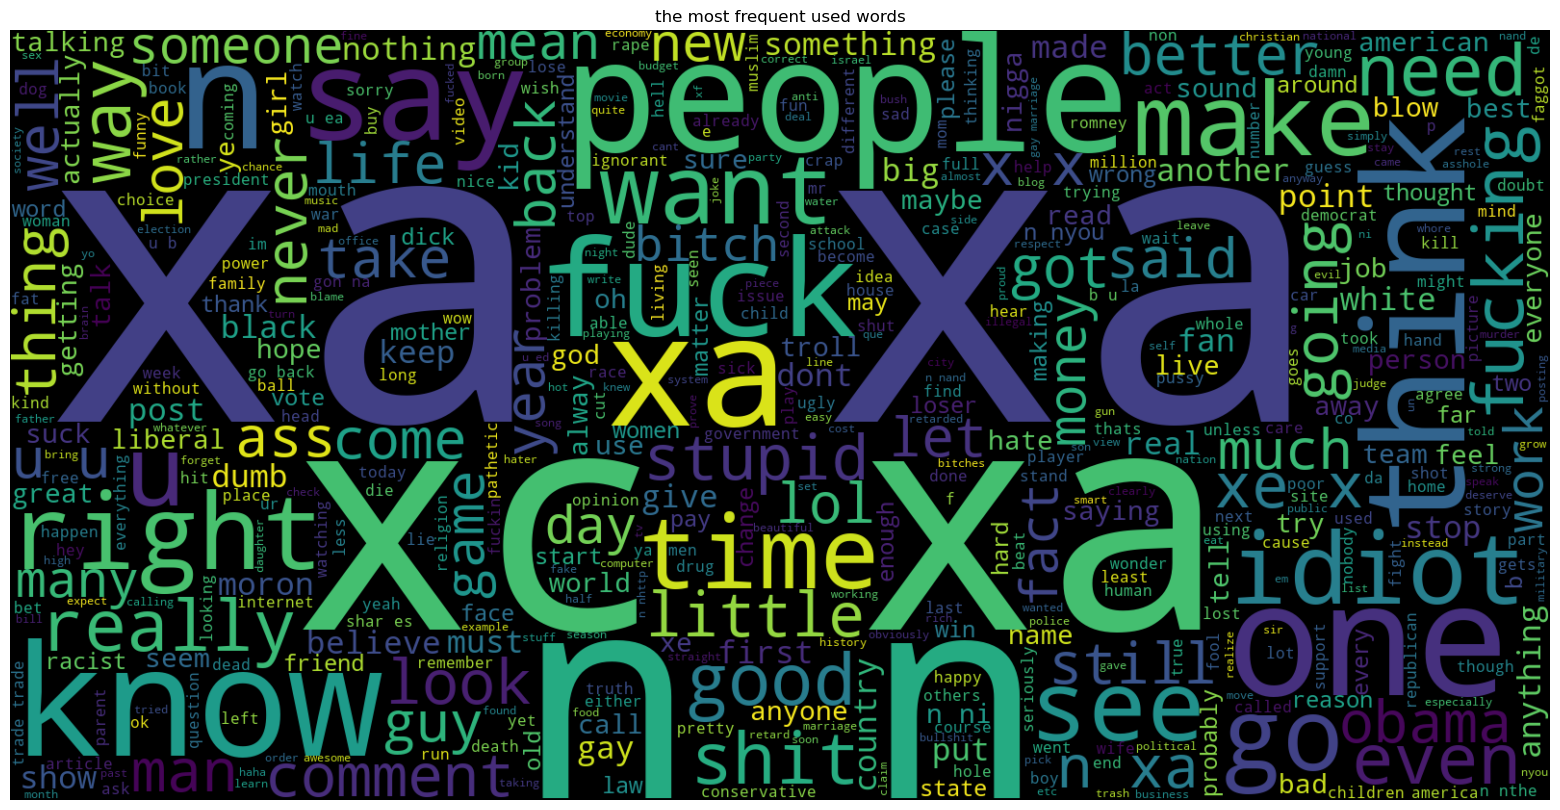

In [30]:
text = ' '.join(word for word in df['Text'])
plt.figure(figsize=(20,10),facecolor=None)
wordcloud = WordCloud(max_words=500,height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("the most frequent used words")
plt.show()

# Set length

In [31]:
maxlen = 45
vocab_size = len(tokenizer.word_index)+1
x = pad_sequences(x,padding='post', maxlen = maxlen)
x

array([[  14,  656,    0, ...,    0,    0,    0],
       [  20,  158,  115, ...,    0,    0,    0],
       [   5,    1,  618, ...,    0,    0,    0],
       ...,
       [ 375,  253,  243, ...,    0,    0,    0],
       [ 471, 1123,  672, ...,    0,    0,    0],
       [1983,  236, 3210, ...,   33,  321, 4324]])

# LSTM MODEL BUILDING

In [32]:
y = df['class']
y = y.values
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [33]:
EMBEDDING_SIZE=128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 5
MAX_sentense_len = 45

In [34]:
modelLSTM =Sequential()
modelLSTM.add(Embedding(vocab_size,128, input_shape = (maxlen,),name = "embedding"))
modelLSTM.add(SpatialDropout1D(0.5))
modelLSTM.add(LSTM(32,dropout=0.3))
modelLSTM.add(Flatten())
modelLSTM.add(Dense(1))
modelLSTM.add(Activation('sigmoid'))
modelLSTM.summary()

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 45, 128)        │     2,983,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 45, 128)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,681 (11.46 MB)

 Trainable params: 3,003,681 (11.46 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
modelLSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
modelLSTM.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.6890 - loss: 0.5714 - val_accuracy: 0.6830 - val_loss: 0.6066
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7077 - loss: 0.5467 - val_accuracy: 0.7398 - val_loss: 0.5746
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7624 - loss: 0.5271 - val_accuracy: 0.7460 - val_loss: 0.5626
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7607 - loss: 0.5167 - val_accuracy: 0.7415 - val_loss: 0.5596
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7710 - loss: 0.4955 - val_accuracy: 0.7477 - val_loss: 0.5451
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7752 - loss: 0.4761 - val_accuracy: 0.7523 - val_loss: 0.5488
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8093 - loss: 0.4183 - val_accuracy: 0.7699 - val_loss: 0.5802
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8414 - loss: 0.3652 - val_accu

In [41]:
loss,acc =  modelLSTM.evaluate(x_test,y_test,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7851 - loss: 0.5604
testing accuracy 78.9%


# RNN MODEL

In [42]:
from tensorflow.keras.layers import SimpleRNN

In [43]:
modelRNN = Sequential()
modelRNN.add(Embedding(vocab_size,128,input_shape=(maxlen,),name="embedding"))
modelRNN.add(SpatialDropout1D(0.5))
modelRNN.add(SimpleRNN(32,dropout=0.3))
modelRNN.add(Flatten())
modelRNN.add(Dense(1))
modelRNN.add(Activation('sigmoid'))
modelRNN.summary()

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 45, 128)        │     2,983,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 45, 128)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,988,225 (11.40 MB)

 Trainable params: 2,988,225 (11.40 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
modelRNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
modelRNN.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.6609 - loss: 0.6385 - val_accuracy: 0.6824 - val_loss: 0.6249
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6840 - loss: 0.6106 - val_accuracy: 0.6659 - val_loss: 0.6561
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7322 - loss: 0.5339 - val_accuracy: 0.6193 - val_loss: 0.6540
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7821 - loss: 0.4744 - val_accuracy: 0.6369 - val_loss: 0.6953
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8320 - loss: 0.3863 - val_accuracy: 0.6438 - val_loss: 0.7121
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8616 - loss: 0.3297 - val_accuracy: 0.6540 - val_loss: 0.7844
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8884 - loss: 0.2747 - val_accuracy: 0.6369 - val_loss: 0.8119
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9078 - loss: 0.2308 - val_accu

In [51]:
loss,acc =  modelRNN.evaluate(x_test,y_test,batch_size=32)
print(' RNN testing accuracy %.1f%%'%(100*acc))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6023 - loss: 1.0442
 RNN testing accuracy 62.4%


# performance analysis

In [52]:
loss,acc =  modelLSTM.evaluate(x_test,y_test,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))
loss,acc =  modelRNN.evaluate(x_test,y_test,batch_size=32)
print(' RNN testing accuracy %.1f%%'%(100*acc))


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7851 - loss: 0.5604
testing accuracy 78.9%
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6023 - loss: 1.0442
 RNN testing accuracy 62.4%


# conclusion and prediction

the LSTM MODEL have the higher accuracy with 78.9%, so it is the most aptable model to this dataset

In [53]:
df[100:110+1]

,class,Text
100,1,fuck
101,0,powers n nmsnbc far far biased hostile comment...
102,0,horrible trades talking
103,1,retards like back institutions
104,0,weapons lol hes idiot waste human space made r...
105,0,big fan rondo dude ball classify big talker tr...
106,1,pig maher forgot meds know one sick sob forget
107,0,rich screaming taxes xa average middle class a...
108,1,mr king time either grow pair balls join democ...
109,0,amused fact weblog cons drop issue turns loser...


In [58]:
df

,class,Text
0,1,fuck dad
1,0,really understand point xa seems mixing apples...
2,0,xc xa majority canadians wrong n nunless suppo...
3,0,listen dont wan na get married man women dont ...
4,0,c xe c b u ea n xu u ed ng u u b u eddng bi u ...
...,...,...
8794,0,never really gave much thought figured back door
8795,0,nadie se salva de la regla xd
8796,0,question boy girl
8797,1,leave email phone number maybe twits meet beat...


In [66]:
example = ["retards like back institutions"]
max_length = 100
# Vectorization
example_sequence = tokenizer.texts_to_sequences(example)
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding='post', truncating='post')


result = modelLSTM.predict(example_padded)
print(result)
if result <= 0.5:
    print("NOT BULLYING")
else:
    print("BULLYING")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.7890245]]
BULLYING


In [65]:
example = ["never really gave much thought figured back door"]
max_length = 50
# Vectorization
example_sequence = tokenizer.texts_to_sequences(example)
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding='post', truncating='post')


result = modelLSTM.predict(example_padded)
print(result)
if result <= 0.5:
    print("NOT BULLYING")
else:
    print("BULLYING")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.0572804]]
NOT BULLYING
